This project deals with the prediction of stroke based on lifestyle and basic bioparameters of the patient. The csv dataset is obtained from kaggle which has to be cleaned and processed before training.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\sairam\Downloads\healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The Id column is not needed for the prediction of stroke. Hence we can remove that column from the dataset.

In [3]:
data=data.drop(['id'],axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We can see that there are 5110 rows with 11 columns, out of which 10 are input features and 1 is output target variable. There are some empty values associated with that of BMI column.

In [4]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Also we can observe that maximum value of BMI recorded is 97.6 which is physically impossible. It might be an observational error or they might have recorded the percentile value instead of the original value. Hence it would be appropriate to change those values to the logical range (0-50).
Also we are filling the empty values based on the forward values using ffill method.

In [6]:
#the maximum possible value for BMI would be 50, so the other values would be observational error. Hence it would be logical to convert them to the maximum value possible.
for x in data.index:
    if data.loc[x,'bmi']>50:
        data.loc[x,'bmi']=50
data['bmi']
data['bmi']=data['bmi'].fillna(method='ffill')
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Next we need to encode the string data types to corresponding categorical class numbers.

In [7]:
data_categorical=data[['gender','ever_married','work_type','Residence_type','smoking_status']]
data_numerical=data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
print(data_categorical['gender'].unique())
print(data_categorical['ever_married'].unique())
print(data_categorical['work_type'].unique())
print(data_categorical['Residence_type'].unique())
print(data_categorical['smoking_status'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
df_categorical = pd.get_dummies(data_categorical, drop_first=True)
data=pd.concat([df_categorical,data_numerical],axis=1)
data.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,1,0,1,0,0,1,1,0,0,67.0,0,1,228.69,36.6,1
1,0,0,1,0,0,1,0,0,0,1,0,61.0,0,0,202.21,36.6,1
2,1,0,1,0,1,0,0,0,0,1,0,80.0,0,1,105.92,32.5,1
3,0,0,1,0,1,0,0,1,0,0,1,49.0,0,0,171.23,34.4,1
4,0,0,1,0,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1


In [9]:
data.drop_duplicates()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,1,0,1,0,0,1,1,0,0,67.0,0,1,228.69,36.6,1
1,0,0,1,0,0,1,0,0,0,1,0,61.0,0,0,202.21,36.6,1
2,1,0,1,0,1,0,0,0,0,1,0,80.0,0,1,105.92,32.5,1
3,0,0,1,0,1,0,0,1,0,0,1,49.0,0,0,171.23,34.4,1
4,0,0,1,0,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,0,1,0,1,0,0,1,0,1,0,80.0,1,0,83.75,18.6,0
5106,0,0,1,0,0,1,0,1,0,1,0,81.0,0,0,125.20,40.0,0
5107,0,0,1,0,0,1,0,0,0,1,0,35.0,0,0,82.99,30.6,0
5108,1,0,1,0,1,0,0,0,1,0,0,51.0,0,0,166.29,25.6,0


this dataset doesnt contain any duplicate values. The next step is to identify the outliers. This is done using box plot, z-score and IQR. 

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

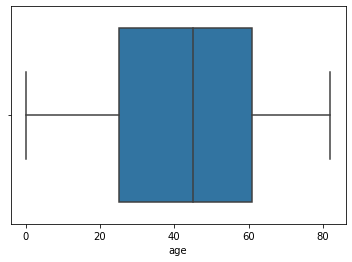

In [10]:
sns.boxplot(data['age'])


C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


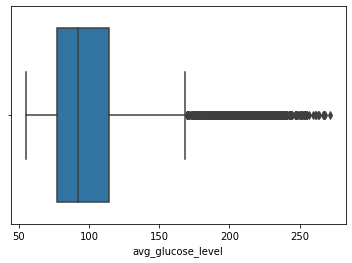

In [11]:
sns.boxplot(data['avg_glucose_level'])
np.where(data['avg_glucose_level']>170)
lis=np.where(data['avg_glucose_level']>=170)

C:\Users\sairam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

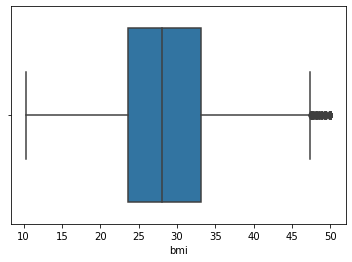

In [12]:
sns.boxplot(data['bmi'])

In [14]:
from scipy import stats
import numpy as np
 
z1 = np.abs(stats.zscore(data['age']))
z2 = np.abs(stats.zscore(data['avg_glucose_level']))
z3 = np.abs(stats.zscore(data['bmi']))
print('age'+str(np.where(z1>3)))
print('avg_glucose_level'+str(np.where(z2>3)))
print('bmi'+str(np.where(z3>3)))

age(array([], dtype=int64),)
avg_glucose_level(array([  33,   45,  122,  123,  135,  193,  196,  220,  243,  256,  303,
        330,  386,  552,  755,  785, 1067, 1070, 1113, 1207, 1384, 1436,
       1453, 1529, 1626, 2182, 2203, 2293, 2462, 2494, 2633, 2693, 2751,
       3088, 3215, 3342, 3393, 4048, 4249, 4283, 4356, 4447, 4457, 4470,
       4598, 4711, 4909, 4983, 5034], dtype=int64),)
bmi(array([], dtype=int64),)


In [15]:
Q1 = np.percentile(data['age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = data['age'] >= (Q3+1.5*IQR)
#print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['age'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
print(np.where(lower))
#data=data.drop(upper[0], inplace = True)
#data=data.drop(lower[0], inplace = True)

(array([], dtype=int64),)
(array([], dtype=int64),)


<ipython-input-15-8681c27f81c6>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['age'], 25,
<ipython-input-15-8681c27f81c6>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['age'], 75,


In [16]:
Q1 = np.percentile(data['avg_glucose_level'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['avg_glucose_level'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = data['avg_glucose_level'] >= (Q3+1.5*IQR)
#print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['avg_glucose_level'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
print(np.where(lower))

(array([   0,    1,    3,    4,    5,   13,   14,   16,   17,   19,   20,
         21,   22,   23,   27,   28,   29,   30,   32,   33,   36,   44,
         45,   54,   55,   57,   58,   59,   60,   66,   71,   73,   76,
         90,   95,   97,  101,  102,  107,  113,  115,  122,  123,  124,
        128,  130,  132,  134,  135,  137,  138,  139,  144,  149,  150,
        151,  155,  157,  158,  163,  175,  179,  187,  189,  190,  193,
        195,  196,  201,  212,  215,  217,  218,  219,  220,  222,  225,
        226,  233,  234,  235,  241,  242,  243,  254,  256,  258,  272,
        277,  278,  293,  298,  303,  307,  314,  318,  325,  326,  330,
        331,  332,  337,  343,  350,  355,  360,  365,  386,  396,  399,
        411,  417,  426,  429,  433,  436,  444,  456,  466,  467,  468,
        477,  479,  492,  515,  544,  549,  551,  552,  559,  563,  570,
        576,  581,  583,  585,  595,  598,  599,  610,  616,  620,  642,
        706,  708,  719,  744,  746,  755,  762,  

<ipython-input-16-c3089f9f307f>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['avg_glucose_level'], 25,
<ipython-input-16-c3089f9f307f>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['avg_glucose_level'], 75,


In [17]:
Q1 = np.percentile(data['bmi'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['bmi'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
upper = data['bmi'] >= (Q3+1.5*IQR)
#print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['bmi'] <= (Q1-1.5*IQR)
#print("Lower bound:", lower)
print(np.where(lower))

(array([  21,   66,  113,  254,  258,  270,  333,  341,  342,  358,  430,
        462,  466,  493,  539,  544,  595,  622,  637,  662,  672,  715,
        761,  805,  860,  928, 1003, 1061, 1077, 1239, 1257, 1267, 1304,
       1322, 1501, 1529, 1532, 1559, 1564, 1575, 1584, 1595, 1596, 1641,
       1660, 1782, 1898, 1988, 2016, 2067, 2071, 2081, 2128, 2136, 2232,
       2277, 2284, 2285, 2290, 2309, 2330, 2411, 2441, 2545, 2555, 2567,
       2585, 2723, 2764, 2815, 2816, 2840, 2883, 2896, 2897, 3024, 3060,
       3218, 3238, 3243, 3305, 3333, 3439, 3508, 3541, 3588, 3594, 3606,
       3688, 3702, 3825, 3867, 3909, 3931, 3959, 3980, 4071, 4126, 4154,
       4188, 4209, 4223, 4225, 4351, 4405, 4407, 4456, 4475, 4533, 4650,
       4704, 4779, 4838, 4847, 4858, 4906, 4952, 5009, 5057], dtype=int64),)
(array([], dtype=int64),)


<ipython-input-17-c8f8956a1ddc>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['bmi'], 25,
<ipython-input-17-c8f8956a1ddc>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(data['bmi'], 75,


As you can see there are certain values of average glucose levels and age that are beyond the 75 percentile range, hence detected as outliers by the IQR and bo plot. But in our case, they aren't outliers because stroke occurences may depend on age and high glucose levels which are considered as some of the risk factors for the disease. Hence we must not remove them. 

I have planned to train the data using SVM, which is a distance based algorithm. Hence it would be appropriate to keep all the data in the same scale (0-1) so that the algorithm can work effectively. The age, average glucose level and bmi are in different ranges and have to be normalized to the range of 0-1.

In [18]:
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) 
data.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.816895,0.0,1.0,0.801265,0.662469,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743652,0.0,0.0,0.679023,0.662469,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.975586,0.0,1.0,0.234512,0.559194,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.597168,0.0,0.0,0.536008,0.607053,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963379,1.0,0.0,0.549349,0.345088,1.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Male                     5110 non-null   float64
 1   gender_Other                    5110 non-null   float64
 2   ever_married_Yes                5110 non-null   float64
 3   work_type_Never_worked          5110 non-null   float64
 4   work_type_Private               5110 non-null   float64
 5   work_type_Self-employed         5110 non-null   float64
 6   work_type_children              5110 non-null   float64
 7   Residence_type_Urban            5110 non-null   float64
 8   smoking_status_formerly smoked  5110 non-null   float64
 9   smoking_status_never smoked     5110 non-null   float64
 10  smoking_status_smokes           5110 non-null   float64
 11  age                             5110 non-null   float64
 12  hypertension                    51

In [19]:
data.describe()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,0.000196,0.656164,0.004305,0.572407,0.160274,0.134442,0.508023,0.173190,0.370254,0.154403,0.526692,0.097456,0.054012,0.235563,0.466623,0.048728
std,0.492578,0.013989,0.475034,0.065480,0.494778,0.366896,0.341160,0.499985,0.378448,0.482920,0.361370,0.276033,0.296607,0.226063,0.209046,0.187886,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.304199,0.000000,0.000000,0.102137,0.335013,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.548340,0.000000,0.000000,0.169721,0.448363,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.743652,0.000000,0.000000,0.272228,0.574307,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The data has been cleaned and processed. Now its good to go for training. The y (label) is the last column (stroke) and the x (data) are the columns other than stroke. Then the data is split into training and testing by using the train_test_split from sklearn.

In [25]:
y=data['stroke']
data=data.drop(['stroke'],axis=1)
X=data

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))

training data shape is :(4088, 16).
training label shape is :(4088,).
testing data shape is :(1022, 16).
testing label shape is :(1022,).


The SVM alogirthm is then instantiated with the polynomial kernel for distance estimation of datapoints. SVM is known to be a powerful algorithm especially in data that have non-linear relationships.

In [28]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='poly',gamma=8)
svc_model.fit(X_train, y_train)

SVC(gamma=8, kernel='poly')

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= svc_model .predict(X_train)
percentage=svc_model.score(X_train,y_train)
res=confusion_matrix(y_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_model .predict(X_test)
percentage=svc_model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("validation confusion matrix")
print(res)
# check the accuracy on the training set
print('training accuracy = '+str(svc_model.score(X_train, y_train)*100))
print('testing accuracy = '+str(svc_model.score(X_test, y_test)*100))

Training confusion matrix
[[3885    4]
 [ 141   58]]
validation confusion matrix
[[945  27]
 [ 46   4]]
training accuracy = 96.45303326810176
testing accuracy = 92.85714285714286


In [40]:
y_train.value_counts()

0.0    3889
1.0     199
Name: stroke, dtype: int64

In [41]:
y_test.value_counts()

0.0    972
1.0     50
Name: stroke, dtype: int64

The algorithm has produced accuracy more than 90%, but the model is not good enough. Because the data suffers from class imbalance. Hence treating that condition would improve the metrics even more. Hence we are now going to resample the data.

In [2]:
data=pd.read_csv(r"C:\Users\sairam\Downloads\healthcare-dataset-stroke-data.csv")
data=data.drop(['id'],axis=1)
for x in data.index:
    if data.loc[x,'bmi']>50:
        data.loc[x,'bmi']=50
data['bmi']
data['bmi']=data['bmi'].fillna(method='ffill')
data.isnull().sum()
data_categorical=data[['gender','ever_married','work_type','Residence_type','smoking_status']]
data_numerical=data[['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke']]
df_categorical = pd.get_dummies(data_categorical, drop_first=True)
data=pd.concat([df_categorical,data_numerical],axis=1)
for column in data.columns:
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min()) 

data.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.816895,0.0,1.0,0.801265,0.662469,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.743652,0.0,0.0,0.679023,0.662469,1.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.975586,0.0,1.0,0.234512,0.559194,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.597168,0.0,0.0,0.536008,0.607053,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.963379,1.0,0.0,0.549349,0.345088,1.0


In [3]:
print(data['stroke'].value_counts())
df_class_0 = data[data['stroke'] == 0]
df_class_1 = data[data['stroke'] == 1]

0.0    4861
1.0     249
Name: stroke, dtype: int64


As you can see, there are only 249 entries for stroke 1 class. Hence we are going to upsample the minority class.

In [4]:
df_class_1_over = df_class_1.sample(4861, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
#print(df_test_over.value_counts())

In [5]:
df_test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 249 to 53
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Male                     9722 non-null   float64
 1   gender_Other                    9722 non-null   float64
 2   ever_married_Yes                9722 non-null   float64
 3   work_type_Never_worked          9722 non-null   float64
 4   work_type_Private               9722 non-null   float64
 5   work_type_Self-employed         9722 non-null   float64
 6   work_type_children              9722 non-null   float64
 7   Residence_type_Urban            9722 non-null   float64
 8   smoking_status_formerly smoked  9722 non-null   float64
 9   smoking_status_never smoked     9722 non-null   float64
 10  smoking_status_smokes           9722 non-null   float64
 11  age                             9722 non-null   float64
 12  hypertension                    97

In [6]:
y1=df_test_over['stroke']
df_test_over=df_test_over.drop(['stroke'],axis=1)
X1=df_test_over

In [10]:
from sklearn.model_selection import train_test_split

X1_train,X1_test ,y1_train, y1_test = train_test_split(X1,y1,
                                                   test_size=0.2,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y1)

print('training data shape is :{}.'.format(X1_train.shape))
print('training label shape is :{}.'.format(y1_train.shape))
print('testing data shape is :{}.'.format(X1_test.shape))
print('testing label shape is :{}.'.format(y1_test.shape))

training data shape is :(7777, 16).
training label shape is :(7777,).
testing data shape is :(1945, 16).
testing label shape is :(1945,).


In [11]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf',gamma=8)
svc_model.fit(X1_train, y1_train)

SVC(gamma=8)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= svc_model .predict(X1_train)
percentage=svc_model.score(X1_train,y1_train)
res=confusion_matrix(y1_train,predictions)
print("Training confusion matrix")
print(res)
predictions= svc_model .predict(X1_test)
percentage=svc_model.score(X1_test,y1_test)
res=confusion_matrix(y1_test,predictions)
print("validation confusion matrix")
print(res)
# check the accuracy on the training set
print('training accuracy = '+str(svc_model.score(X1_train, y1_train)*100))
print('testing accuracy = '+str(svc_model.score(X1_test, y1_test)*100))

Training confusion matrix
[[3484  404]
 [  61 3828]]
validation confusion matrix
[[839 134]
 [ 18 954]]
training accuracy = 94.02083065449402
testing accuracy = 92.18508997429305


Even though the accuracy has decreased, the number of false negatives have greatly decreased which is important for medical diagnosis.
False negatives for training before sampling= 141 
False negatives for testing before sampling= 46
False negatives for training after sampling= 61
False negatives for testing after sampling= 18
We can train with poly kernel to further more reduce the false positives and negatives, but that takes a lot of time!!